In [25]:

# <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.0/css/bootstrap.min.css" integrity="sha384-9gVQ4dYFwwWSjIDZnLEWnxCjeSWFphJiwGPXr1jddIhOegiu1FwO5qRGvFXOdJZ4" crossorigin="anonymous">
# <script src="https://code.jquery.com/jquery-3.3.1.slim.min.js" integrity="sha384-q8i/X+965DzO0rT7abK41JStQIAqVgRVzpbzo5smXKp4YfRvH+8abtTE1Pi6jizo" crossorigin="anonymous"></script>
# <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.0/umd/popper.min.js" integrity="sha384-cs/chFZiN24E4KMATLdqdvsezGxaGsi4hLGOzlXwp5UZB1LY//20VyM2taTB4QvJ" crossorigin="anonymous"></script>
# <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.1.0/js/bootstrap.min.js" integrity="sha384-uefMccjFJAIv6A+rW+L4AHf99KvxDjWSu1z9VI8SKNVmz4sk7buKt/6v9KI65qnm" crossorigin="anonymous"></script>

# Ecological Communities 
# in
# Evolutionary Computation

### By Emily Dolson and Charles Ofria
<br><br>
<p style="text-align:center;position:fixed;bottom:0px"><i class="fab fa-twitter"></i>@emilyldolson &nbsp;&nbsp;&nbsp;&nbsp;
            <i class="fas fa-envelope"></i>dolsonem@msu.edu</p>

In [26]:
%%latex
$x^2$

<IPython.core.display.Latex object>

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np
from numpy import ma
import scipy as sp
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import itertools
import math
import random
import networkx as nx

%matplotlib inline

## Evolutionary Computation
<div class="container">
    <img src="evolution.gif" alt="Evolving bipedal walking" width=100%/> 

    <p style=text-align:center>Using evolution as a machine learning algorithm</p>
    <p class="image_credit">Image credit: <a href="https://www.alanzucconi.com">Alan Zucconi</a></p>
</div>

## Evolutionary Computation Works
<div class="container">
    
    <img class="mx-auto" src="antenna.jpg" alt="Evolved antenna"/> 

    <p style=text-align:center>Antenna evolved for NASA</p>
    <p class="image_credit">Hornby et al, 2008</p>
</div>

## But it requires a diverse population
<div class="container">
    
    <img class="mx-auto" src="static_landscape.gif" alt="Evolution converges on a single peak" width=100%/> 

    <p style=text-align:center>Populations can get stuck on part of the fitness landscape and not explore the rest</p>
    <p class="image_credit">Image credit: Bjorn Ostman and Randy Olson</p>
</div>

## Diversity maintenance techniques
<div class="container">
    
    <img class="mx-auto" src="diversity_maintenance.png" alt="Map of selected diversity maintenace schemes" width=100%/> 

    <p style=text-align:center>There are a lot of them. Most involve creating ecological interactions.</p>

</div>

## Fitness sharing

<div class="container">
  
    $$sh(d) =    \begin{cases}
      1 - (\frac{d}{\sigma_{\text{share}}})^{\alpha} & d < \sigma_{\text{share}}\\
      0 &  d \geq \sigma_{\text{share}}  
   \end{cases}$$
   
   <p style=text-align:center>Decrease solutions' fitness based on quantity of similar organisms in the population</p>

    <p class="image_credit">Goldberg and Richardson, 1987</p>
    
</div>

## Fitness sharing

<div class="container">
    
    <img class="mx-auto" src="finches.jpg" alt="Picture of Darwin's finches" width=50%/> 

    <p style=text-align:center>The population partitions the genotype/phenotype space in the same way that species in nature partition resources</p>
    <p class="image_credit">Image credit: Charles Darwin</p>

</div>

## Eco-EA
<div class="container">

<p style="text-align:center">Associates sub-components of a problem with limited resources</a>

</div>

<p class="image_credit">Goings and Ofria, 2012</p>


In [41]:
def make_zngis(org_1_res_1=.5, org_1_res_2=1.0, org_2_res_1=1.0, org_2_res_2=.5):
    X, Y = np.meshgrid(np.arange(0, 1000, 200), np.arange(0, 1000, 200))
    U = -.0025*(org_1_res_2)*X -.0025*(org_2_res_2)*X 
    V = -.0025*(org_1_res_1)*Y - .0025*(org_2_res_1)*Y 
    plt.plot([0, 800*org_1_res_1], [800*org_1_res_2, 0])
    plt.plot([0, 800*org_2_res_1], [800*org_2_res_2, 0])
    Q = plt.quiver(X, Y, U, V, units='width')


style = {'description_width': 'initial'}
layout = widgets.Layout(
    display='flex',
    flex_flow='row',
    flex_grow=1,
    justify_content='space-between'
)

a = widgets.FloatSlider(layout=layout, description = "Species 1 resource 1 use", style=style, min=0, max=1, value=.5, orientation="horizontal")
b = widgets.FloatSlider(layout=layout, description = "Species 1 resource 2 use", style=style, min=0, max=1, value=1.0, orientation="horizontal")
c = widgets.FloatSlider(layout=layout, description = "Species 2 resource 1 use", style=style, min=0, max=1, value=1.0, orientation="horizontal")
d = widgets.FloatSlider(layout=layout, description = "Species 2 resource 2 use", style=style, min=0, max=1, value=.5, orientation="horizontal")
ui = widgets.VBox([a, b, c, d], layout=widgets.Layout(
    display='flex',
    flex_grow = 1,
    align_items='stretch',
#     width='50%'
))

# widgets.HBox([widgets.VBox([a, b, c]), out])

# w.layout.width = "50%"
# w1.layout.display = "flex"
# w.layout.border = '1px solid black'
# w1.layout.flex_grow = 1
# w.layout.flex_flow = "column wrap"

# ui.layout.justify_content = "center"
# ui.layout.align_items = "stretch"


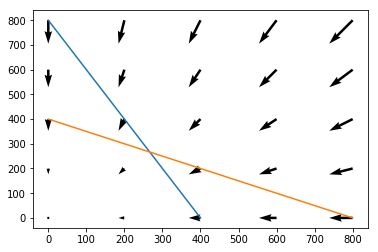

In [44]:
# w1 = widgets.interactive_output(make_zngis, {"org_1_res_1":a, "org_1_res_2":b, "org_2_res_1":c, "org_2_res_2":d})

# widgets.HBox([w1, ui], layout=widgets.Layout(align_items="center", justify_content="center"))

make_zngis()

<div class="container">
    <p style="text-align:center">Community is governed by standard resource-competition theory</p>
</div>


## Lexicase selection


<div class="container">
    <p style="text-align:center">Populations are evaluated on N criteria in a random order. Best are kept at each step until 1 remains.</p>
    <div class="row">
        <div class="col">
            
            <h4 style="text-align:center">Example population</h4>
            <table class="table mx-auto" style="width:50%">
              <thead>
                <tr>
                  <th scope="col">id</th>
                  <th scope="col">A</th>
                  <th scope="col">B</th>
                  <th scope="col">C</th>
                </tr>
              </thead>
              <tbody>
                <tr>
                  <th scope="row">1</th>
                  <td>4</td>
                  <td>1</td>
                  <td>2</td>
                </tr>
                <tr>
                  <th scope="row">2</th>
                  <td>1</td>
                  <td>3</td>
                  <td>5</td>
                </tr>
                <tr>
                  <th scope="row">3</th>
                  <td>2</td>
                  <td>0</td>
                  <td>5</td>
                </tr>
              </tbody>
            </table>
        </div>
        <div class="col">
            <img class="mx-auto" src="lexicase.svg" alt="Lexicase selection decisions tree" width=100%/> 
        </div>
    </div>
    <p style="text-align:center">Spatially heterogeneous meta-community with unlimited dispersal and intense competitive exclusion.</p>
    <p class="image_credit">Spector et al, 2012</p>

</div>

## What do these communities look like?

In [30]:
# Create population


def make_pop(size=10, length=5):
    pop = []
    for _ in range(size):
        # Geometric distribution makes it rare to be particularly good at an axis, to simulate
        # a population occupying a diversity of niches (as you would expect to evolve under
        # these selection schemes)
        pop.append(tuple([np.random.geometric(.5) for i in range(length)]))
    return pop

def lexicase_fitness(orgs, **kwargs):
    """
    Calculate the biological fitness of each org in orgs (a list of lists of ints, 
    where each inner list is an org) under lexicase selection.
    
    Returns - a dictionary mapping orgs (lists of ints) to fitnesses
    """
    fitnesses = {org:0.0 for org in orgs}

    # Iterate over all possible orderings of fitness functions
    # and count up the number that each org wins
    for order in itertools.permutations(range(len(orgs[0]))): 
        remaining = orgs[:]
        
        # Find best individuals for each axis
        for axis in order:
            best = 0
            winners = []
            for i in range(len(remaining)):
                if remaining[i][axis] > remaining[best][axis]:
                    best = i
                    winners = [remaining[i]]
                elif remaining[i][axis] == remaining[best][axis]:
                    winners.append(remaining[i])
            remaining = winners
            if len(remaining) == 1:
                break
        for org in remaining:
            fitnesses[org] += 1.0/len(remaining) # handle ties
    
    for org in orgs:
        fitnesses[org] /= math.factorial(len(orgs[0])) # convert to proportion of "islands"
        
    return fitnesses

def eco_ea_fitness(orgs, cost=1, cf=.0025, niche_width=3, **kwargs):
    """
    Calculate the biological fitness of each org in orgs (a list of lists of ints, 
    where each inner list is an org) under Eco-EA.
    
    Optional arguments:
    cost - the cost of attempting to do a task
    cf - fraction of existing resource consumed
    niche_width - how well do you have to do on a task in order to consume resource/pay cost?
    
    Returns - a dictionary mapping orgs (lists of ints) to fitnesses
    """
    
    if "cost" in kwargs:
        cost = kwargs["cost"]
    if "cf" in kwargs:
        cf = kwargs["cf"]
    if "niche_width" in kwargs:
        niche_width = kwargs["niche_width"]
    
    fitnesses = {org:1.0 for org in orgs}
    rel_fitnesses = {org:0.0 for org in orgs}
    
    for axis in range(len(orgs[0])):
        res = 2000
        count = 0
        for org in orgs:
            if org[axis] >= 3:
                count += 1
        if count > 0:
            res /= count # We're ignoring resource accumulation, but that won't affect interactions
        for org in orgs:
            if org[axis] >= niche_width:
                fitnesses[org] *= 2**((cf*res*(org[axis]/5.0)**2) - cost) # division by 5 normalizes score for
                                                                          # consistency, though unecesary here
    
    # Calculate biological fitness, now that we've adjusted fitness scores by resoure use
    for org in orgs: 
        wins = 0
        ties = -1 #org will tie with itself
        fit = fitnesses[org]
        for val in fitnesses.values():
            if fit > val:
                wins += 1
            elif fit == val:
                ties += 1
        rel_fitnesses[org] = (2/len(orgs)) * (wins/(len(orgs) - 1) + .5*ties/(len(orgs) - 1))
        # assumes tournament size of 2
        
    return rel_fitnesses


def sharing_fitness(orgs, sigma_share=8, alpha = 1, **kwargs):
    """
    Calculate the biological fitness of each org in orgs (a list of lists of ints, 
    where each inner list is an org) under fitness sharing.
    
    Optional arguments:
    sigma_share - sharing threshold
    a - determines shape of sharing function
    
    Returns - a dictionary mapping orgs (lists of ints) to fitnesses
    """
    
    if "sigma_share" in kwargs:
        sigma_share = kwargs["sigma_share"]
    if "alpha" in kwargs:
        alpha = kwargs["alpha"]
        
    fitnesses = {org:1.0 for org in orgs}
    rel_fitnesses = {org:0.0 for org in orgs}
    
    for org in orgs:
        niche_count = 0.0
        for org2 in orgs:
            # Use Euclidean distance between vectors as sharing function
            dist = sp.spatial.distance.euclidean(org, org2)
            if dist < sigma_share:
                niche_count += 1 - (dist/sigma_share)**alpha
        fit = sum(org)
        fit /= niche_count
        fitnesses[org] = fit

    # Noe that we've adjusted for sharing, calculate biological fitness
    for org in orgs:
        less = 0.0
        equal = 0.0
        greater = 0.0
        
        for org2 in orgs:
            if fitnesses[org2] < fitnesses[org]:
                less += 1
            elif fitnesses[org2] == fitnesses[org]:
                equal += 1
            else:
                greater += 1
                
        p_less = less/len(orgs)
        p_equal = equal/len(orgs)
        p_greater = greater/len(orgs)
        
        p_success = (2.0/len(orgs) * p_less) + (1.0/len(orgs) * p_equal)
        
        rel_fitnesses[org] = p_success
        
    return rel_fitnesses


def calc_competition(orgs, fit_fun, **kwargs):
    """
    Calculates the competition between individuals in orgs under the selection scheme
    described by fit_fun.
    
    Inputs:
    - Orgs is a list of whatever type fit_fun is expecting to operate on.
    - fit_fun should take a list of orgs and return a dicitionary of their fitness functions.
    
    Returns a dictionary of dictionaries of dictionaries (the input type expected by networkx)
    indicating the fitness effects of the org from the inner dictionary on the org from the outer
    dictionary. The innermost dictionary has at most a single value, weight, indicating the
    dtrength and direction of the interaction.
    """
    # Calculate fitnesses in context of the whole population
    fitnesses = fit_fun(orgs, **kwargs)
    
    effects = {o:{} for o in orgs}
    
    # Iterate over population, removing each org in turn and
    # calculting the fitnesses of the others in its absence.
    for org in orgs:
        curr = orgs[:]
        curr.remove(org)
        curr.append(tuple([0 for i in org]))

        new_fits = fit_fun(curr)
        
        for adj_org in orgs:
            if adj_org not in new_fits:
                continue
            if fitnesses[adj_org] - new_fits[adj_org] != 0:
                effects[org][adj_org] = {"weight":fitnesses[adj_org] - new_fits[adj_org]}
            
    return effects

In [31]:
def make_interaction_graph(population=10, traits=5, sigma_share=8):
    pop = make_pop(population, traits)
    # Calculate interactions under different selection schemes
    lex = calc_competition(pop, lexicase_fitness)
    eco = calc_competition(pop, eco_ea_fitness)
    share = calc_competition(pop, sharing_fitness)

    # Extract weights so we can scale graphs appropriately
    weights = []
    for key in lex:
        for key2 in lex[key]:
            weights.extend(lex[key][key2].values())
    for key in eco:
        for key2 in eco[key]:
            weights.extend(eco[key][key2].values())
    for key in share:
        for key2 in share[key]:
            weights.extend(share[key][key2].values())

    global_vmin = min(weights)
    global_vmax = max(weights)

    if abs(global_vmin) > abs(global_vmax):
        global_vmax = abs(global_vmin)
    else:
        global_vmin = -1*global_vmax
        
    fig = plt.figure(figsize=(15, 4.5))
    
    # Lexicase
    lex_g = nx.DiGraph()
    lex_g = nx.from_dict_of_dicts(lex, create_using=lex_g)
    lex_fitness_dict = lexicase_fitness(pop)
    lex_nodes = [lex_fitness_dict[node] for node in lex_g.nodes]
    lex_e=[d["weight"] for (u,v,d) in lex_g.edges(data=True)] # colors
    lex_widths=[abs(d['weight'])*40 for (u,v,d) in lex_g.edges(data=True)] #linewidths

    # Eco-EA
    eco_g = nx.DiGraph()
    eco_g = nx.from_dict_of_dicts(eco, create_using=eco_g)

    eco_ea_fitness_dict = eco_ea_fitness(pop)

    eco_nodes = [eco_ea_fitness_dict[node] for node in eco_g.nodes]
    eco_e=[d["weight"]*4 for (u,v,d) in eco_g.edges(data=True)] # we have to increase color intensity to see lines because
                                                            # lexicase has such stronger interactions
    eco_widths=[abs(d['weight'])*60 for (u,v,d) in eco_g.edges(data=True)] # edge widths are consistent across graphs
    
    # Fitness sharing
    share_g = nx.DiGraph()
    share_g = nx.from_dict_of_dicts(share, create_using=share_g)

    sharing_fitness_dict = sharing_fitness(pop)

    share_nodes = [sharing_fitness_dict[node] for node in share_g.nodes]
    share_e=[d["weight"] * 4 for (u,v,d) in share_g.edges(data=True)]
    share_widths=[abs(d['weight'])*60 for (u,v,d) in share_g.edges(data=True)]

    node_vmax = max(lex_nodes+eco_nodes+share_nodes)
    node_vmin = min(lex_nodes+eco_nodes+share_nodes)

    
    plt.subplot(131)
    
    nx.draw_shell(lex_g, vmax=node_vmax, vmin=node_vmin, node_color=lex_nodes, cmap=matplotlib.cm.copper, node_size=100, edge_color=lex_e, edge_vmin=global_vmin, edge_vmax=global_vmax,edge_cmap=matplotlib.cm.seismic_r, width=lex_widths, with_labels=False)
    plt.title("Lexicase", fontsize=30)

    
    plt.subplot(132)
    #e=["red" if d['weight'] < 0 else "blue" for (u,v,d) in eco_g.edges(data=True)]

    nx.draw_shell(eco_g, vmax=node_vmax, vmin=node_vmin, edge_cmap=matplotlib.cm.seismic_r, cmap=matplotlib.cm.copper, node_color=eco_nodes, node_size=100, width=eco_widths, edge_vmin=global_vmin, edge_vmax=global_vmax, edge_color=eco_e, with_labels=False)
    plt.title("Eco-EA", fontsize=30)


    #e=["red" if d['weight'] < 0 else "blue" for (u,v,d) in share_g.edges(data=True)]
    plt.subplot(133)
    nx.draw_shell(share_g, vmax=node_vmax, vmin=node_vmin, node_size=100, node_color=share_nodes, edge_color=share_e, cmap=matplotlib.cm.copper,edge_cmap=matplotlib.cm.seismic_r, edge_vmin=global_vmin, edge_vmax=global_vmax, width=share_widths, with_labels=False)
    plt.title("Sharing", fontsize=30)
    
    cmap = matplotlib.cm.copper
    norm = matplotlib.colors.Normalize(vmin=node_vmin, vmax=node_vmax)

    plt.subplots_adjust(right=.9)
    cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])

    cb1 = matplotlib.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                    norm=norm,
                                    orientation='vertical')
    cb1.set_label('Fitness')


In [39]:
style = {'description_width': 'initial'}
layout = widgets.Layout(
    display='flex',
    flex_flow='row',
    flex_grow=1,
    justify_content='space-between'
)

a = widgets.IntSlider(layout=layout, description = "Population size", style=style, min=1, max=20, value=10, orientation="horizontal")
b = widgets.IntSlider(layout=layout, description = "N Traits", style=style, min=1, max=10, value=5, orientation="horizontal")
c = widgets.FloatSlider(layout=layout, description = "Sharing threshold", style=style, min=0.0, max=20.0, value=8.0, orientation="horizontal")

ui = widgets.VBox([a, b,c], layout=widgets.Layout(
    display='flex',
    flex_grow = 1,
    align_items='stretch',
#     width='50%'
))



In [13]:
w = widgets.interactive_output(make_interaction_graph, {"population":a, "traits":b, "sigma_share":c})

widgets.VBox([w, ui], layout=widgets.Layout(align_items="center", justify_content="center", flex_grow=1, width="100%"))


VBox(children=(Output(), VBox(children=(IntSlider(value=10, description='Population size', layout=Layout(display='flex', flex_flow='row', justify_content='space-between'), max=20, min=1, style=SliderStyle(description_width='initial')), IntSlider(value=5, description='N Traits', layout=Layout(display='flex', flex_flow='row', justify_content='space-between'), max=10, min=1, style=SliderStyle(description_width='initial')), FloatSlider(value=8.0, description='Sharing threshold', layout=Layout(display='flex', flex_flow='row', justify_content='space-between'), max=20.0, style=SliderStyle(description_width='initial'))), layout=Layout(align_items='stretch', display='flex'))), layout=Layout(align_items='center', justify_content='center', width='100%'))

## What are the long term evolutionary effects?
<div class="container">
    
    <img class="mx-auto" src="figs/time_all.png" alt="Phylogenetic diversity over time" width=100%/> 

</div>

## Conclusions

- Importing ecological theory into EC can help solve problems
- EC is a trove of eco-evolutionary dynamics data

## Questions?

<div class="container">
    
    <img class="mx-auto" src="full_2691.jpg" alt="Computer generated tree" width="50%"/> 

    <p class="image_credit">Image credit: 
        <a href="https://www.contextfreeart.org/gallery2/#design/2691"> Context Free Art user jwmatthysn
        </a>
    </p>

            <p style="text-align:center"><i class="fab fa-twitter"></i>@emilyldolson &nbsp;&nbsp;&nbsp;&nbsp;
            <i class="fas fa-envelope"></i>dolsonem@msu.edu</p>


</div>
